In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats= np.random.uniform(-90,90 , size=1500)
lngs= np.random.uniform(-180, 180 , size =1500 )
lat_lngs= zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates= list(lat_lngs)
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [5]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data= []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count= 1
set_count=1

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50== 0 and i>= 50):
        record_count= 1
        set_count+=1 
        
    # Create endpoint URL with each city.
    city_url = url+ "&q="+ cities[i]

Beginning Data Retrieval     
-----------------------------


In [9]:
# Create an empty list to hold the weather data.
city_data= []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count= 1
set_count=1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather= requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | lima
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | port blair
Processing Record 6 of Set 1 | mantua
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | sarai naurang
Processing Record 12 of Set 1 | solovetskiy
City not found. Skipping...
Processing Record 13 of Set 1 | woodward
Processing Record 14 of Set 1 | tautira
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | yorosso
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | tabuk
Processing Record 21 of Set 1 | sorland
Pr

Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | samusu
City not found. Skipping...
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | danshui
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | impfondo
Processing Record 45 of Set 4 | morondava
Processing Record 46 of Set 4 | takoradi
Processing Record 47 of Set 4 | kahului
Processing Record 48 of Set 4 | dwarka
Processing Record 49 of Set 4 | raudeberg
Processing Record 50 of Set 4 | kaitangata
Processing Record 1 of Set 5 | koygorodok
Processing Record 2 of Set 5 | cayenne
Processing Record 3 of Set 5 | hervey bay
Processing Record 4 of Set 5 | oranjestad
Processing Record 5 of Set 5 | tuatapere
Processing Record 6 of Set 5 | boende
Processing Record 7 of Set 5 | maiduguri
Processing Record 8 of Set 5 | urumqi
Processing Record 9 of Set 5 | victoria
Processing Record 10 of Set 5 | yamada
Processing Record 11 of Set 5 | ribeira grande
Processing Record 12 of Set 5 | toliar

Processing Record 26 of Set 8 | amos
Processing Record 27 of Set 8 | dauriya
Processing Record 28 of Set 8 | prado
Processing Record 29 of Set 8 | katsuura
Processing Record 30 of Set 8 | almaty
Processing Record 31 of Set 8 | bogalusa
Processing Record 32 of Set 8 | balimo
City not found. Skipping...
Processing Record 33 of Set 8 | straseni
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | maykain
City not found. Skipping...
Processing Record 36 of Set 8 | gazanjyk
Processing Record 37 of Set 8 | bac lieu
Processing Record 38 of Set 8 | la ronge
Processing Record 39 of Set 8 | santa lucia
Processing Record 40 of Set 8 | te anau
Processing Record 41 of Set 8 | marawi
Processing Record 42 of Set 8 | cockburn town
Processing Record 43 of Set 8 | namuac
Processing Record 44 of Set 8 | izvestkovyy
Processing Record 45 of Set 8 | nha trang
Processing Record 46 of Set 8 | xining
Processing Record 47 of Set 8 | suzaka
Processing Record 48 of Set 8 | manadhoo
Process

Processing Record 14 of Set 12 | belaya gora
Processing Record 15 of Set 12 | saint-georges
Processing Record 16 of Set 12 | gwadar
Processing Record 17 of Set 12 | jalu
Processing Record 18 of Set 12 | anuradhapura
Processing Record 19 of Set 12 | dalton
Processing Record 20 of Set 12 | hay river
Processing Record 21 of Set 12 | nsanje
Processing Record 22 of Set 12 | beisfjord
Processing Record 23 of Set 12 | ouadda
Processing Record 24 of Set 12 | jadu
Processing Record 25 of Set 12 | khasan
Processing Record 26 of Set 12 | kenai
Processing Record 27 of Set 12 | vilhena
Processing Record 28 of Set 12 | iquique
Processing Record 29 of Set 12 | palana
Processing Record 30 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 31 of Set 12 | aykhal
Processing Record 32 of Set 12 | tromso
Processing Record 33 of Set 12 | coracao de jesus
Processing Record 34 of Set 12 | cubuk
Processing Record 35 of Set 12 | nantucket
Processing Record 36 of Set 12 | vao
Processi

In [14]:
len(city_data)

574

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,65.88,86,90,8.05,US,2021-07-30 03:27:12
1,Kruisfontein,-34.0033,24.7314,48.88,78,5,5.53,ZA,2021-07-30 03:27:13
2,Lima,-12.0432,-77.0282,59.25,88,90,10.36,PE,2021-07-30 03:24:45
3,Mataura,-46.1927,168.8643,50.49,79,100,3.47,NZ,2021-07-30 03:27:13
4,Port Blair,11.6667,92.7500,84.36,79,88,17.34,IN,2021-07-30 03:23:22
5,Mantua,45.1667,10.7833,73.71,83,8,2.21,IT,2021-07-30 03:27:13
6,Bluff,-46.6000,168.3333,50.81,74,100,2.71,NZ,2021-07-30 03:27:14
7,Rikitea,-23.1203,-134.9692,71.58,76,2,4.25,PF,2021-07-30 03:27:14
8,Hermanus,-34.4187,19.2345,51.91,80,40,6.78,ZA,2021-07-30 03:27:14
9,Sarai Naurang,32.8259,70.7814,91.65,57,4,3.36,PK,2021-07-30 03:27:15


In [16]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2021-07-30 03:27:12,34.6391,-120.4579,65.88,86,90,8.05
1,Kruisfontein,ZA,2021-07-30 03:27:13,-34.0033,24.7314,48.88,78,5,5.53
2,Lima,PE,2021-07-30 03:24:45,-12.0432,-77.0282,59.25,88,90,10.36
3,Mataura,NZ,2021-07-30 03:27:13,-46.1927,168.8643,50.49,79,100,3.47
4,Port Blair,IN,2021-07-30 03:23:22,11.6667,92.7500,84.36,79,88,17.34


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module
import time
# Get today's date in seconds.
today= time.time()
today

1627616537.2438412

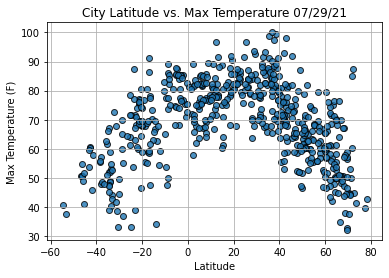

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

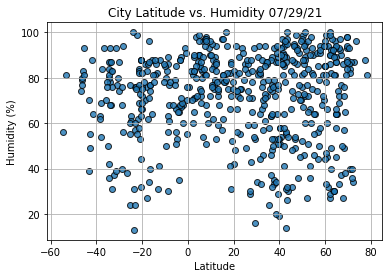

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

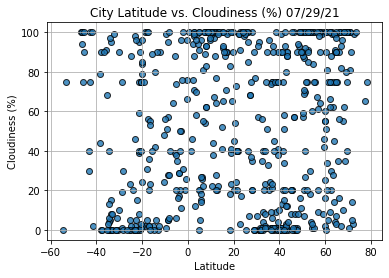

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

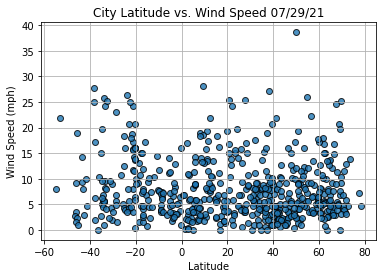

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()